In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [3]:
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
data.shape

(10000, 12)

In [6]:
data.duplicated().sum()

0

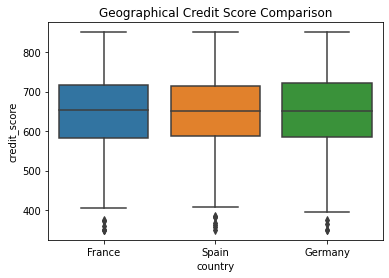

In [7]:
# 1. Geographical Credit Score Comparison
sns.boxplot(x='country', y='credit_score', data=data)
plt.title('Geographical Credit Score Comparison')
plt.show()

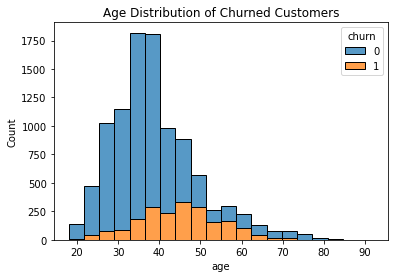

In [8]:
# 2. Age Distribution of Churned Customers
sns.histplot(data=data, x='age', hue='churn', multiple='stack', bins=20)
plt.title('Age Distribution of Churned Customers')
plt.show()

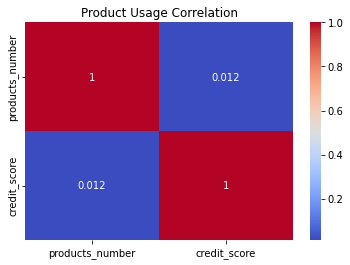

In [9]:
# 3. Product Usage Correlation
sns.heatmap(data[['products_number', 'credit_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Product Usage Correlation')
plt.show()

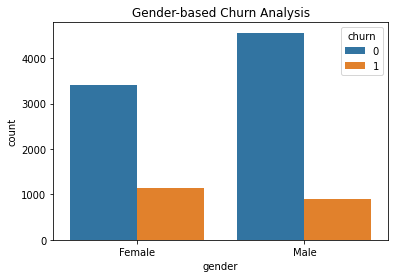

In [10]:
# 4. Gender-based Churn Analysis
sns.countplot(x='gender', hue='churn', data=data)
plt.title('Gender-based Churn Analysis')
plt.show()

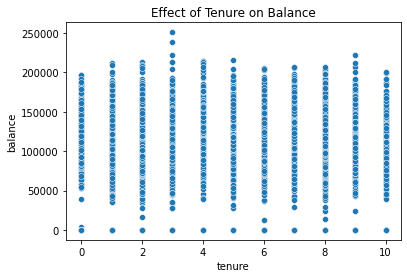

In [11]:
# 5. Effect of Tenure on Balance
sns.scatterplot(x='tenure', y='balance', data=data)
plt.title('Effect of Tenure on Balance')
plt.show()

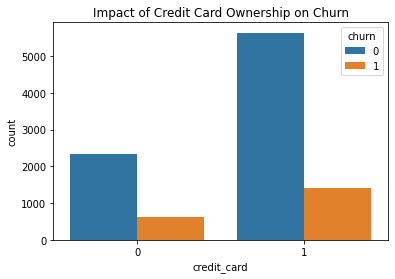

In [12]:
# 6. Impact of Credit Card Ownership on Churn
sns.countplot(x='credit_card', hue='churn', data=data)
plt.title('Impact of Credit Card Ownership on Churn')
plt.show()

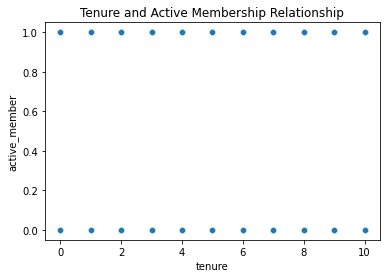

In [13]:
# 7. Tenure and Active Membership Relationship
sns.scatterplot(x='tenure', y='active_member', data=data)
plt.title('Tenure and Active Membership Relationship')
plt.show()

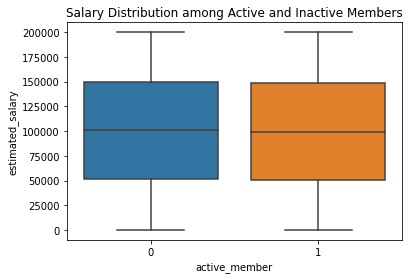

In [14]:
# 8. Salary Distribution among Active and Inactive Members
sns.boxplot(x='active_member', y='estimated_salary', data=data)
plt.title('Salary Distribution among Active and Inactive Members')
plt.show()

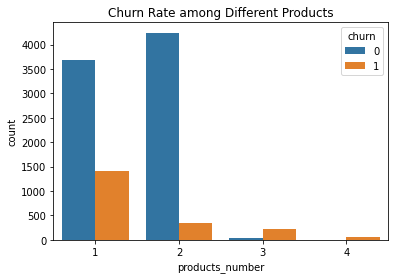

In [15]:
# 9. Churn Rate among Different Products
sns.countplot(x='products_number', hue='churn', data=data)
plt.title('Churn Rate among Different Products')
plt.show()

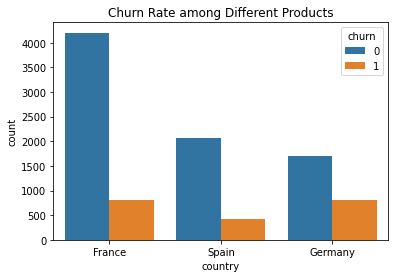

In [17]:
# 9. Churn active members country wise
sns.countplot(x='country', hue='churn', data=data)
plt.title('Churn Rate among Different Products')
plt.show()

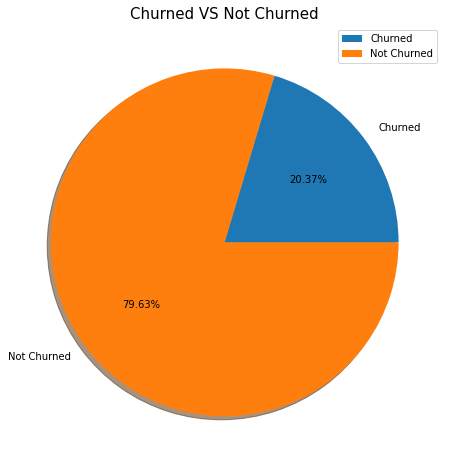

In [18]:
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
figure, axes = plt.subplots(figsize=(10, 8))
axes.pie(sizes, labels=labels,shadow=True,autopct = '%1.2f%%')
plt.legend()
plt.title("Churned VS Not Churned", size = 15)
plt.show()

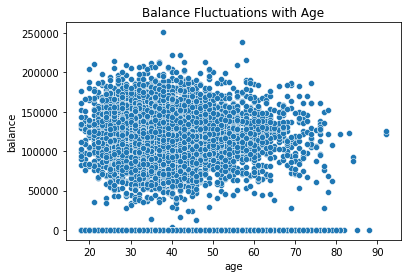

In [25]:
sns.scatterplot(x='age', y='balance', data=data)
plt.title('Balance Fluctuations with Age')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])
data['gender'] = le.fit_transform(data['gender'])

In [33]:
X = data.drop(['customer_id', 'churn'], axis=1)
y = data['churn']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000



In [48]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [49]:
import statsmodels.api as sm
model = sm.Logit(data['churn'], sm.add_constant(data['estimated_salary']))
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505416
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 20 Jan 2024   Pseudo R-squ.:               0.0001448
Time:                        19:08:03   Log-Likelihood:                -5054.2
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                    0.2264
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.4159      0.050    -28.187      0.000      -1.514      -1.317
estimated_s

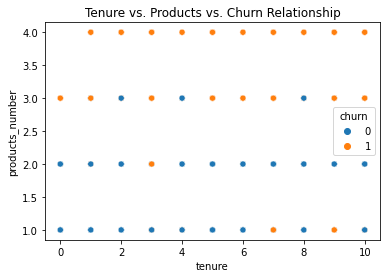

In [50]:
sns.scatterplot(x='tenure', y='products_number', hue='churn', data=data)
plt.title('Tenure vs. Products vs. Churn Relationship')
plt.show()